In [1]:
# load in data

import pandas
from instantiate import genders

races = ['', 'Black', 'White', 'Asian', 'Hispanic', 'Indigenous']

genders = ['All'] + genders

formatted_data = pandas.read_csv('formatted_data.csv')
formatted_data.to_dict()
results = pandas.read_csv('results_120.csv')
results.to_csv()
total_data = len(results['Prediction'])

data_occupation_race = formatted_data['Ocuppation Race']
data_participant_race = formatted_data['Other Participant Race']
data_gender = formatted_data['Gender']

for i in range(total_data):
    if type(data_occupation_race[i]) != str:
        data_occupation_race[i] = ''
    if type(data_participant_race[i]) != str:
        data_participant_race[i] = ''

print(data_occupation_race)
print(data_participant_race)
result_predictions = results['Prediction']
result_true_values = results['True Value']
result_confidence = results['Confidence']

/var/folders/cq/jfz677p53hd170kx2kmc7plr0000gq/T/ipykernel_53435/1033169539.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_occupation_race[i] = ''
/var/folders/cq/jfz677p53hd170kx2kmc7plr0000gq/T/ipykernel_53435/1033169539.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_participant_race[i] = ''


0                  
1                  
2                  
3                  
4                  
            ...    
25915    Indigenous
25916    Indigenous
25917    Indigenous
25918    Indigenous
25919    Indigenous
Name: Ocuppation Race, Length: 25920, dtype: object
0                  
1                  
2                  
3                  
4                  
            ...    
25915    Indigenous
25916    Indigenous
25917    Indigenous
25918    Indigenous
25919    Indigenous
Name: Other Participant Race, Length: 25920, dtype: object


In [113]:

# import xrarray as xr

# analyzed_data = xr.Dataset({'True Occupation': dict(), 'False Occupation': dict(), 'True Participant': dict(), 'False Participant': dict()})

# analyzed_data = {'True Occupation': dict(), 'False Occupation': dict(), 'True Participant': dict(), 'False Participant': dict()}
keys = ['True Occupation', 'False Occupation', 'True Participant', 'False Participant']
analyzed_data = dict()
race_options = list(races)
race_options = ['All']
for race in races:
    race_options.append(race)
# race_options.append('All')
print(race_options)
for race1 in races:
    analyzed_data[race1] = dict()
    for race2 in race_options:
        analyzed_data[race1][race2] = dict()
        for gender in genders:
            analyzed_data[race1][race2][gender] = dict()
            for key in keys:
                analyzed_data[race1][race2][gender][key] = 0
                

# print(result_predictions[0])
# print(data_occupation_race)
# print(data_participant_race)

for i in range(total_data):
    # print(data_occupation_race[i], data_participant_race[i], data_gender[i])
    occupation_race = data_occupation_race[i]
    # if result_confidence[i] < 0.8:
    #     continue
    if result_predictions[i] == 'participant':
        if str(result_true_values[i]) == 'participant':
            analyzed_data[data_occupation_race[i]][data_participant_race[i]][data_gender[i]]['True Participant'] += 1
            analyzed_data[data_occupation_race[i]][data_participant_race[i]]['All']['True Participant'] += 1
            analyzed_data[data_occupation_race[i]]['All'][data_gender[i]]['True Participant'] += 1
            analyzed_data[data_occupation_race[i]]['All']['All']['True Participant'] += 1
        else:
            analyzed_data[data_occupation_race[i]][data_participant_race[i]][data_gender[i]]['False Participant'] += 1
            analyzed_data[data_occupation_race[i]][data_participant_race[i]]['All']['False Participant'] += 1
            analyzed_data[data_occupation_race[i]]['All'][data_gender[i]]['False Participant'] += 1
            analyzed_data[data_occupation_race[i]]['All']['All']['False Participant'] += 1
    else:
        if result_true_values[i] == 'occupation':
            analyzed_data[data_occupation_race[i]][data_participant_race[i]][data_gender[i]]['True Occupation'] += 1
            analyzed_data[data_occupation_race[i]][data_participant_race[i]]['All']['True Occupation'] += 1
            analyzed_data[data_occupation_race[i]]['All'][data_gender[i]]['True Occupation'] += 1
            analyzed_data[data_occupation_race[i]]['All']['All']['True Occupation'] += 1
        else:
            analyzed_data[data_occupation_race[i]][data_participant_race[i]][data_gender[i]]['False Occupation'] += 1
            analyzed_data[data_occupation_race[i]][data_participant_race[i]]['All']['False Occupation'] += 1
            analyzed_data[data_occupation_race[i]]['All'][data_gender[i]]['False Occupation'] += 1
            analyzed_data[data_occupation_race[i]]['All']['All']['False Occupation'] += 1


rates = list(analyzed_data.keys())
for i in range(len(rates)):
    rates[i] = f'{rates[i]} Rate'


# tpr = tp / (tp + fn)

def find_rates(rate, actual_val, all_vals):
    for race1 in races:
        for race2 in race_options:
            for gender in genders:
                analyzed_data[race1][race2][gender][rate] = analyzed_data[race1][race2][gender][actual_val] / (analyzed_data[race1][race2][gender][actual_val] + analyzed_data[race1][race2][gender][all_vals])

def find_rates_list(rate, numerators, denominators):
    # gets accuracy
    total_numerator = 0
    total_denominator = 0
    for race1 in races:
        for race2 in race_options:
            for gender in genders:
                numerator = 0
                denominator = 0
                for n in numerators:
                    numerator += analyzed_data[race1][race2][gender][n]
                for d in denominators:
                    denominator += analyzed_data[race1][race2][gender][d]
                total_numerator += numerator
                total_denominator += denominator
                analyzed_data[race1][race2][gender][rate] = numerator / denominator

    print("Total Accuracy:", total_numerator / total_denominator)

find_rates('True Participant Rate', 'True Participant', 'False Occupation')
find_rates('False Participant Rate', 'False Participant','True Occupation')
find_rates('True Occupation Rate', 'True Occupation', 'False Participant')
find_rates('False Occupation Rate', 'False Occupation', 'True Participant')
find_rates('Participant PPV', 'True Participant', 'False Participant')
find_rates('Participant Error Rate', 'False Participant', 'True Participant')
find_rates('Occupation Rate PPV', 'True Occupation Rate', 'False Occupation Rate')
find_rates('Occupation Error Rate', 'False Occupation Rate', 'True Occupation Rate')
find_rates_list('Accuracy', ['True Participant', 'True Occupation'], ['True Participant', 'True Occupation', 'False Participant', 'False Occupation'])

# # print(analyzed_data)
# pd.DataFrame.from_dict({(i,j): user_dict[i][j] 
#                            for i in user_dict.keys() 
#                            for j in user_dict[i].keys()},
#                        orient='index')

formatted_dict = dict()
for race1 in races:
    for race2 in race_options:
        for gender in genders:
            formatted_dict[(race1, race2, gender)] = analyzed_data[race1][race2][gender]


data_frame = pandas.DataFrame.from_dict(formatted_dict, orient='index')
# data_frame = pandas.DataFrame.from_dict({(rate, race1, race2): analyzed_data[rate][race1][race2]
#                                         for rate in list(analyzed_data.keys())
#                                         for race1 in list(analyzed_data[rate].keys())
#                                         for race2 in list(analyzed_data[rate][race1].keys())},
#                                     orient='index')

# data_frame = pandas.DataFrame.from_dict(analyzed_data)
# data_frame = pandas.DataFrame(analyzed_data)
data_frame.to_csv('analyzed_data_120_examples_shuffled.csv')


['All', '', 'Black', 'White', 'Asian', 'Hispanic', 'Indigenous']
Total Accuracy: 0.8027391975308642


9
True Participant Rate
False Participant Rate
True Occupation Rate
False Occupation Rate
Participant PPV
Participant Error Rate
Occupation Rate PPV
Occupation Error Rate
Accuracy


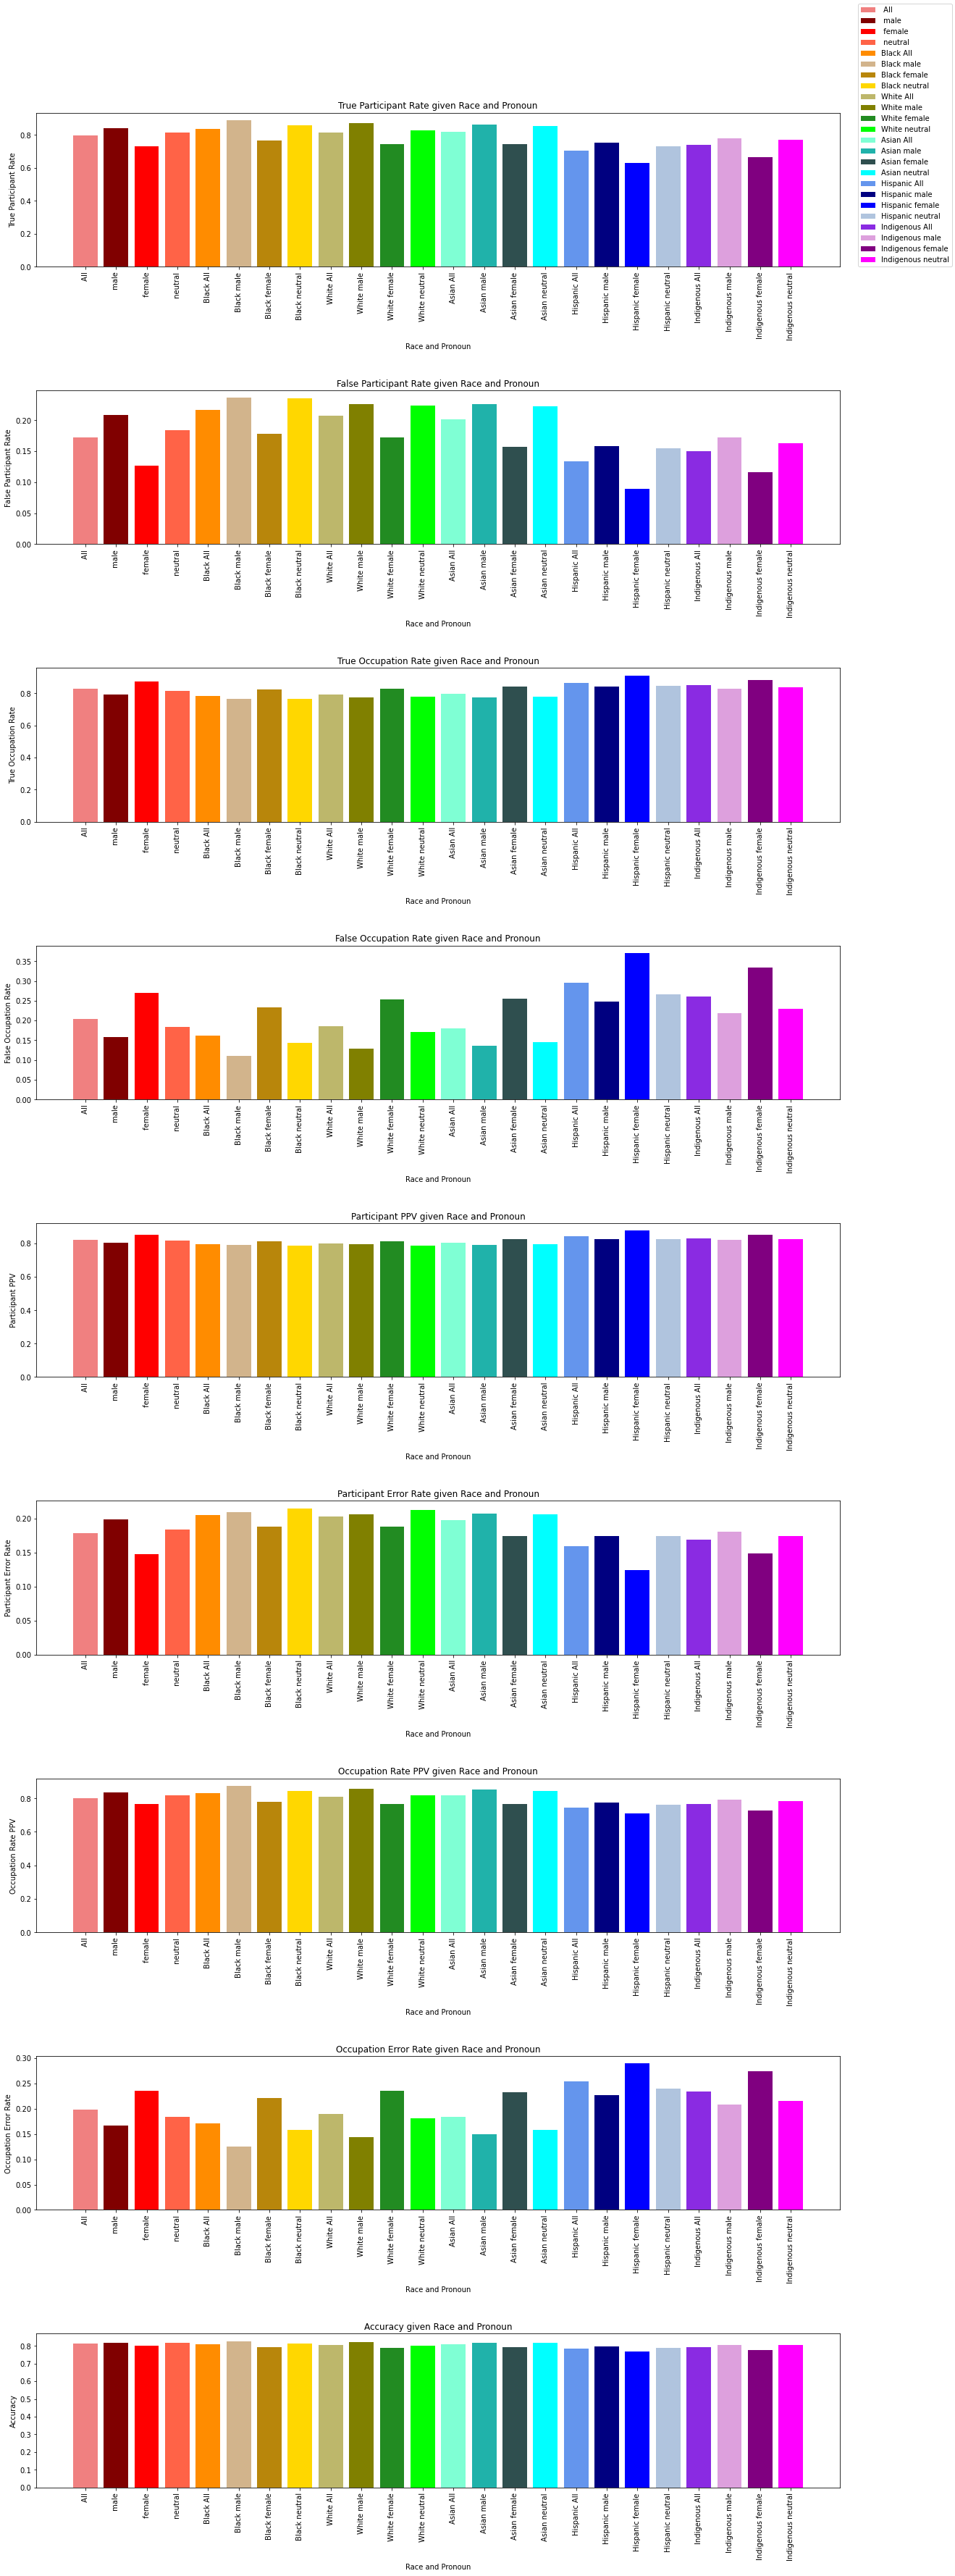

In [114]:
import matplotlib
import matplotlib.pyplot as plt

rates = list(analyzed_data['Black']['Black']['female'].keys())
print(len(rates[4:]))

figure, axis = plt.subplots(9, 1, figsize=(20,50))
figure.tight_layout(pad=15)
coors = list()
for i in range(9):
    # for j in range(3):
    coors.append(i)#[i, 0])

colors = ['lightcoral', 'maroon', 'red', 'tomato', 'darkorange', 'tan', 'darkgoldenrod', 'gold', 'darkkhaki', 'olive', 'forestgreen', 'lime', 'aquamarine', 'lightseagreen', 'darkslategrey', 'cyan', 'cornflowerblue', 'navy', 'blue', 'lightsteelblue', 'blueviolet', 'plum', 'purple', 'fuchsia']
i = 0
for rate in rates[4:]:
    # rate = rates[4]
    data = list()
    labels = list()
    for race in races:
        for gender in genders:
            data.append(analyzed_data[race]['All'][gender][rate])
            labels.append(f"{race} {gender}")

    # for i, j in colors.items(): #Loop over color dictionary
    # for i in range(len(data)):
    #     axis[coors[i][0], coors[i][1]].bar(labels[i], data[i], width=0, color=colors[i], label=labels[i])
    # axis.legend()
    if i == 0:
        for j in range(len(data)):
            # axis[coors[i][0], coors[i][1]]
            axis[coors[i]].bar(labels[j], data[j], color=colors[j], label=labels[j])
    else:
        # axis[coors[i][0], coors[i][1]]
        axis[coors[i]].bar(labels, data, color=colors)
    # axis[coors[i][0], coors[i][1]]
    axis[coors[i]].tick_params(axis='x', rotation=90)
    # axis[coors[i][0], coors[i][1]]
    axis[coors[i]].set_title(f'{rate} given Race and Pronoun')
    axis[coors[i]].set_xlabel('Race and Pronoun')
    axis[coors[i]].set_ylabel(rate)
    # axis[coors[i][0], coors[i][1]].legend()#, color=colors)
    i += 1
    print(rate)

figure.legend()#labels=races)#, color=colors)
plt.savefig("rates_graph.png")
plt.show()

# for race in races:
    



In [4]:
occupation_information = pandas.read_csv("winogender-schemas/data/occupations-stats.tsv", sep="\t")


data_by_occupation = dict()
for occupation in occupation_information['occupation']: 
    data_by_occupation[occupation] = dict()
    for correct_type in ['occupation', 'participant']:
        data_by_occupation[occupation][correct_type] = dict()
        for race1 in race_options:
            data_by_occupation[occupation][correct_type][race1] = dict()
            for race2 in race_options:
                data_by_occupation[occupation][correct_type][race1][race2] = dict()
                for gender in genders:
                    data_by_occupation[occupation][correct_type][race1][race2][gender] = 0


num = 432
for i in range(total_data):
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]][data_occupation_race[i]][data_participant_race[i]][data_gender[i]] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]][data_occupation_race[i]][data_participant_race[i]]['All'] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]]['All'][data_participant_race[i]][data_gender[i]] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]]['All'][data_participant_race[i]]['All'] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]][data_occupation_race[i]]['All'][data_gender[i]] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]][data_occupation_race[i]]['All']['All'] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]]['All']['All'][data_gender[i]] += 1
    data_by_occupation[occupation_information['occupation'][i // num]][result_predictions[i]]['All']['All']['All'] += 1


formatted_dict_occupation = dict()
for occupation in occupation_information['occupation']:
    for correct_type in ['occupation', 'participant']:
        for race1 in race_options:
            for race2 in race_options:
                formatted_dict_occupation[(occupation, correct_type, race1, race2)] = data_by_occupation[occupation][correct_type][race1][race2]


occupation_data_frame = pandas.DataFrame.from_dict(formatted_dict_occupation, orient='index')
# data_frame = pandas.DataFrame.from_dict({(rate, race1, race2): analyzed_data[rate][race1][race2]
#                                         for rate in list(analyzed_data.keys())
#                                         for race1 in list(analyzed_data[rate].keys())
#                                         for race2 in list(analyzed_data[rate][race1].keys())},
#                                     orient='index')

# data_frame = pandas.DataFrame.from_dict(analyzed_data)
# data_frame = pandas.DataFrame(analyzed_data)
occupation_data_frame.to_csv('occupation_analyzed_data_120_examples_shuffled.csv')

print(data_by_occupation)



['All', '', 'Black', 'White', 'Asian', 'Hispanic', 'Indigenous']
7


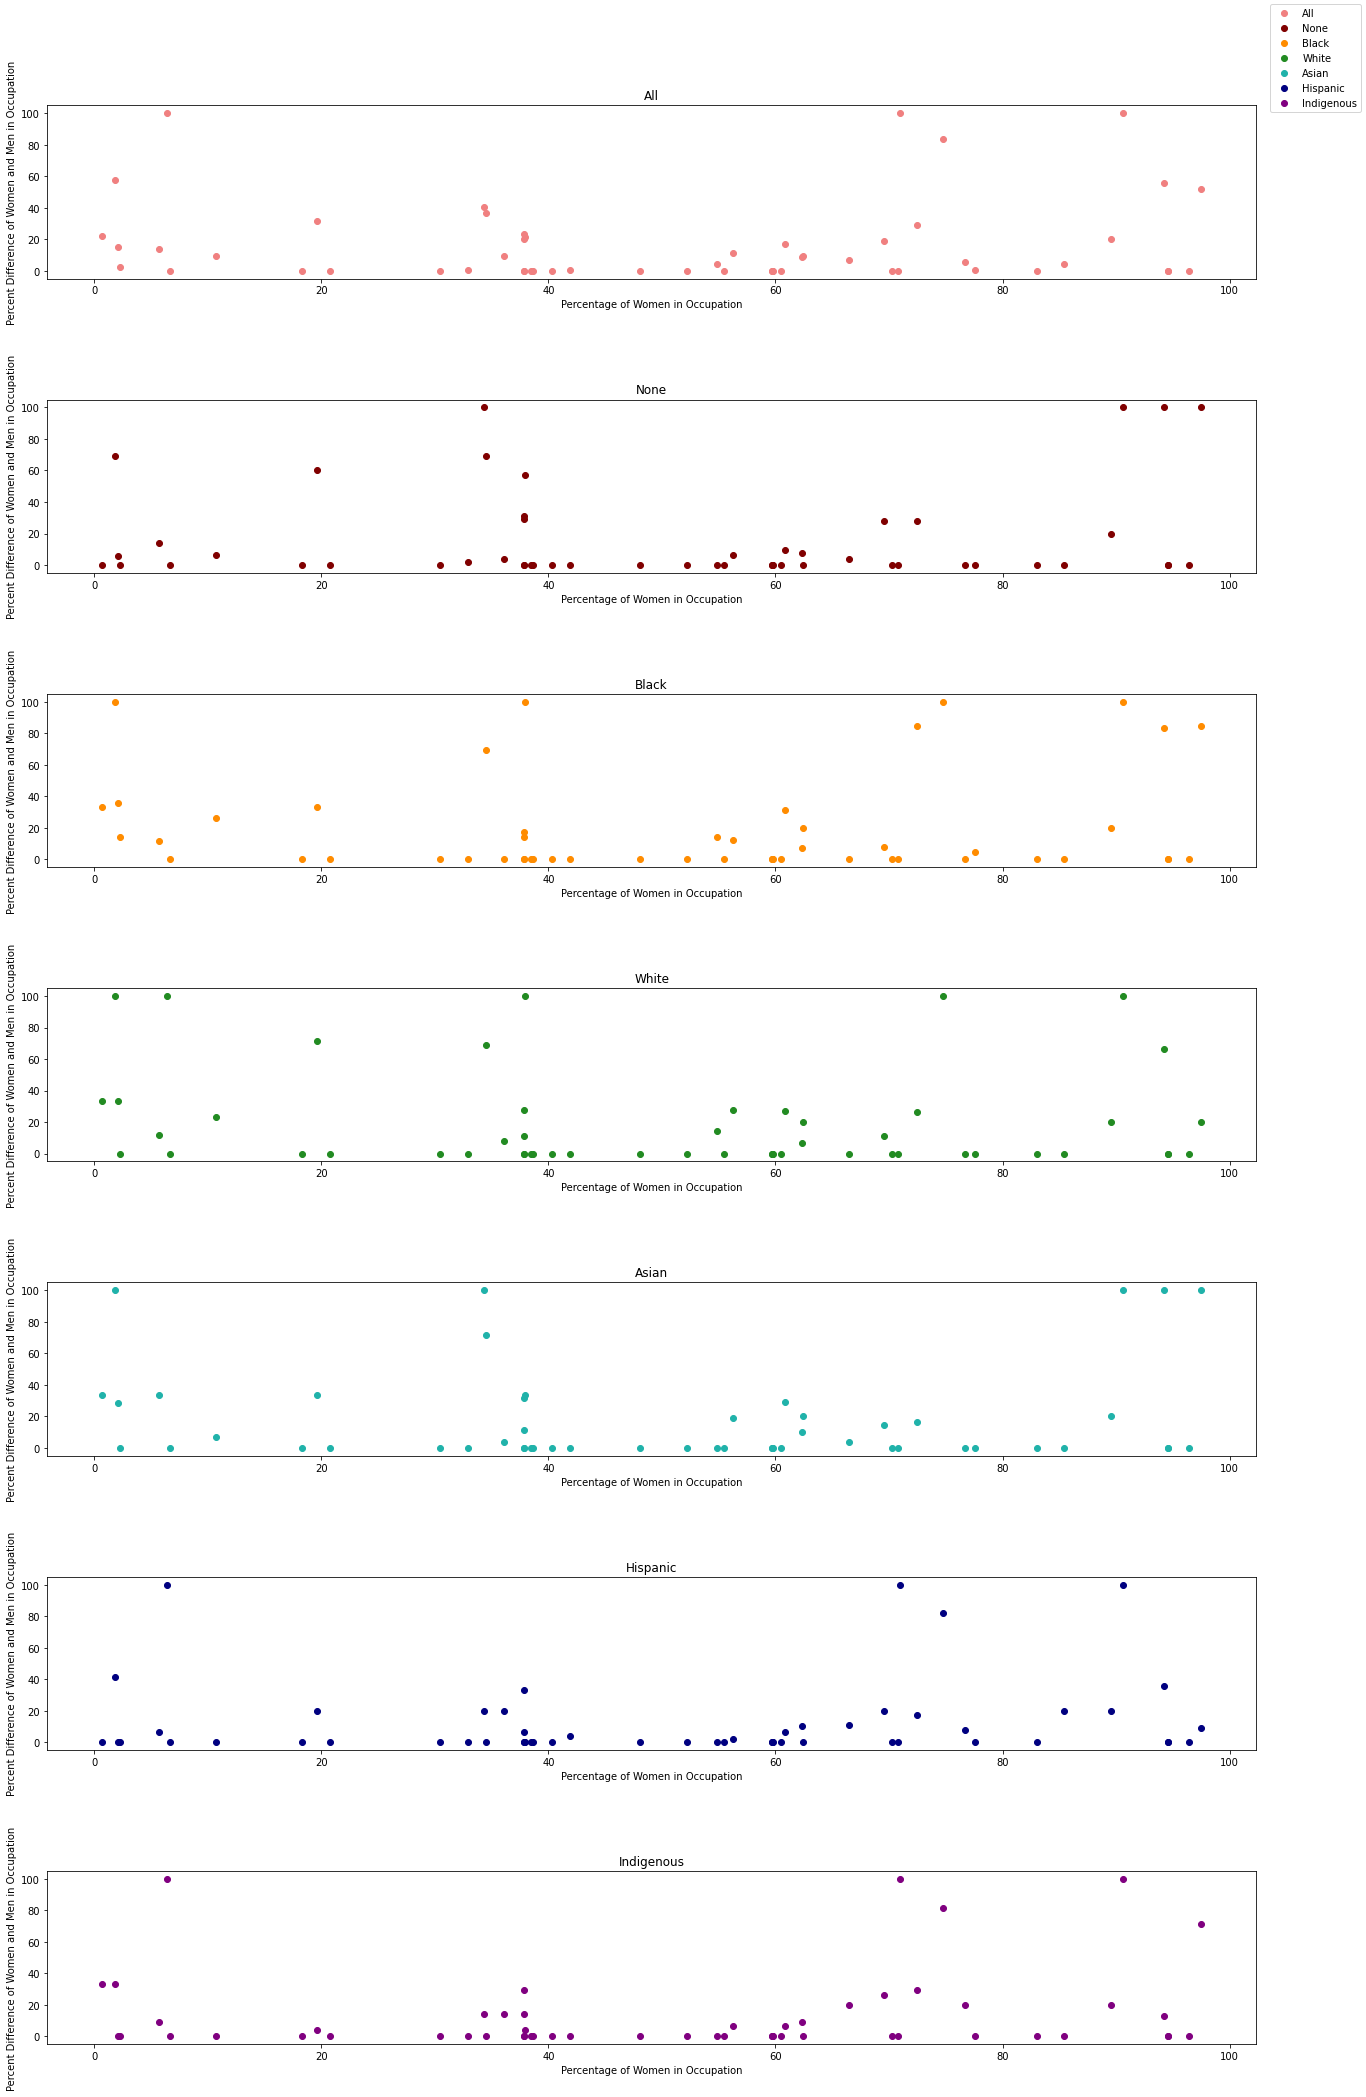

In [136]:

import numpy as np
# for i in range(1):#len(occupation_information['occupation'])):
#     x = list()
#     y = list()
#     occupation = occupation_information['occupation'][i]
#     female_rate = occupation_information['bls_pct_female']
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# colors = ['pink', 'red', 'orange', 'black', 'green', 'blue', 'purple']
# colors = ['lightcoral', 'maroon', 'red', 'tomato', 'darkorange', 'tan', 'darkgoldenrod', 'gold', 'darkkhaki', 'olive', 'forestgreen', 'lime', 'aquamarine', 'lightseagreen', 'darkslategrey', 'cyan', 'cornflowerblue', 'navy', 'blue', 'lightsteelblue', 'blueviolet', 'plum', 'purple', 'fuchsia']
colors = ['lightcoral', 'maroon', 'darkorange', 'forestgreen', 'lightseagreen', 'navy', 'purple', 'fuschia']
print(race_options)
print(len(race_options))

figure, axis = plt.subplots(7, 1, figsize=(20,30))
figure.tight_layout(pad=10)

scatter_coors = list()
for i in range(7):
    scatter_coors.append(i)
# for i in range(4):
#     for j in range(2):
#         scatter_coors.append([i, j])


all_x = list()
all_y = list()
for j in range(len(race_options)):
    race = race_options[j]
    x = list()
    y = list()
    for i in range(len(occupation_information['occupation'])):
        occupation = occupation_information['occupation'][i]
        female_rate = occupation_information['bls_pct_female'][i]
        # if female_rate > 50:
        #     continue
        female = data_by_occupation[occupation]['occupation'][race]['All']['female']
        male = data_by_occupation[occupation]['occupation'][race]['All']['male']
        if female + male == 0:
            continue
        y.append((female - male) / (female + male) * 100)

        # all_y.append((female - male) / (female + male))
        # all_x.append(female_rate)
        x.append(female_rate)
    all_y.append(y)
    all_x.append(x)
        # data_points.append(((female - male) / (female + male), female_rate))
    # exit()
    # print(len(x), len(y))
    # print(x)
    # print(y)
    line = np.polyfit(x, y, deg=1)
    line_x =list()
    line_y = list()
    # print(line)
    i = 0
    for l in line:
        # print(l)
        if i % 2 == 0:
            line_x.append(l)
        else:
            line_y.append(l)
        i += 1
        # line_x.append(l[0])
        # line_y.appen(l[1])
    # print(line)
    if race == '':
        race = 'None'
    axis[scatter_coors[j]]
    # axis[scatter_coors[j][0], scatter_coors[j][1]]
    axis[scatter_coors[j]].scatter(x, y, color=colors[j], label=race)#, xlabel='Percentage of Women in Occupation', ylabel='Percent Difference of Women and Men in Occupation')
    # axis[scatter_coors[j][0], scatter_coors[j][1]]
    axis[scatter_coors[j]].set_title(f"{race}")
    # axis[scatter_coors[j][0], scatter_coors[j][1]]
    axis[scatter_coors[j]].set_xlabel('Percentage of Women in Occupation')
    # axis[scatter_coors[j][0], scatter_coors[j][1]]
    axis[scatter_coors[j]].set_ylabel('Percent Difference of Women and Men in Occupation')
    # axis[scatter_coors[j][0], scatter_coors[j][1]].xlabel('Percentage of Women in Occupation')
    # axis[scatter_coors[j][0], scatter_coors[j][1]].ylabel('Percent Difference of Women and Men in Occupation')
    # plt.title('tit')

    # ax.title()
    # print(line_x)
    # print(line_y)
    # plt.plot(line_x, line_y, 'r')
figure.legend()
plt.savefig("scatter_occupation.png")

plt.show()


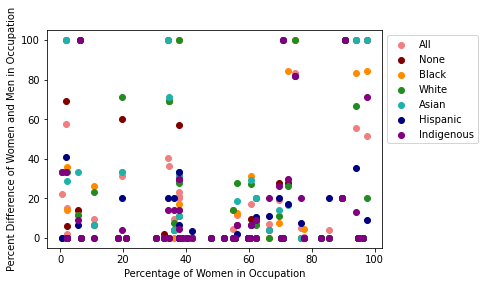

In [144]:
for i in range(len(all_x)):
    race = race_options[i]
    if race == '':
        race = 'None'
    plt.scatter(all_x[i], all_y[i], color=colors[i], label=race)
# plt.title('All data points')

plt.xlabel('Percentage of Women in Occupation')
# axis[scatter_coors[j][0], scatter_coors[j][1]]
plt.ylabel('Percent Difference of Women and Men in Occupation')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig("scatter_occupation_all.png")


['All', '', 'Black', 'White', 'Asian', 'Hispanic', 'Indigenous']
7 7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8


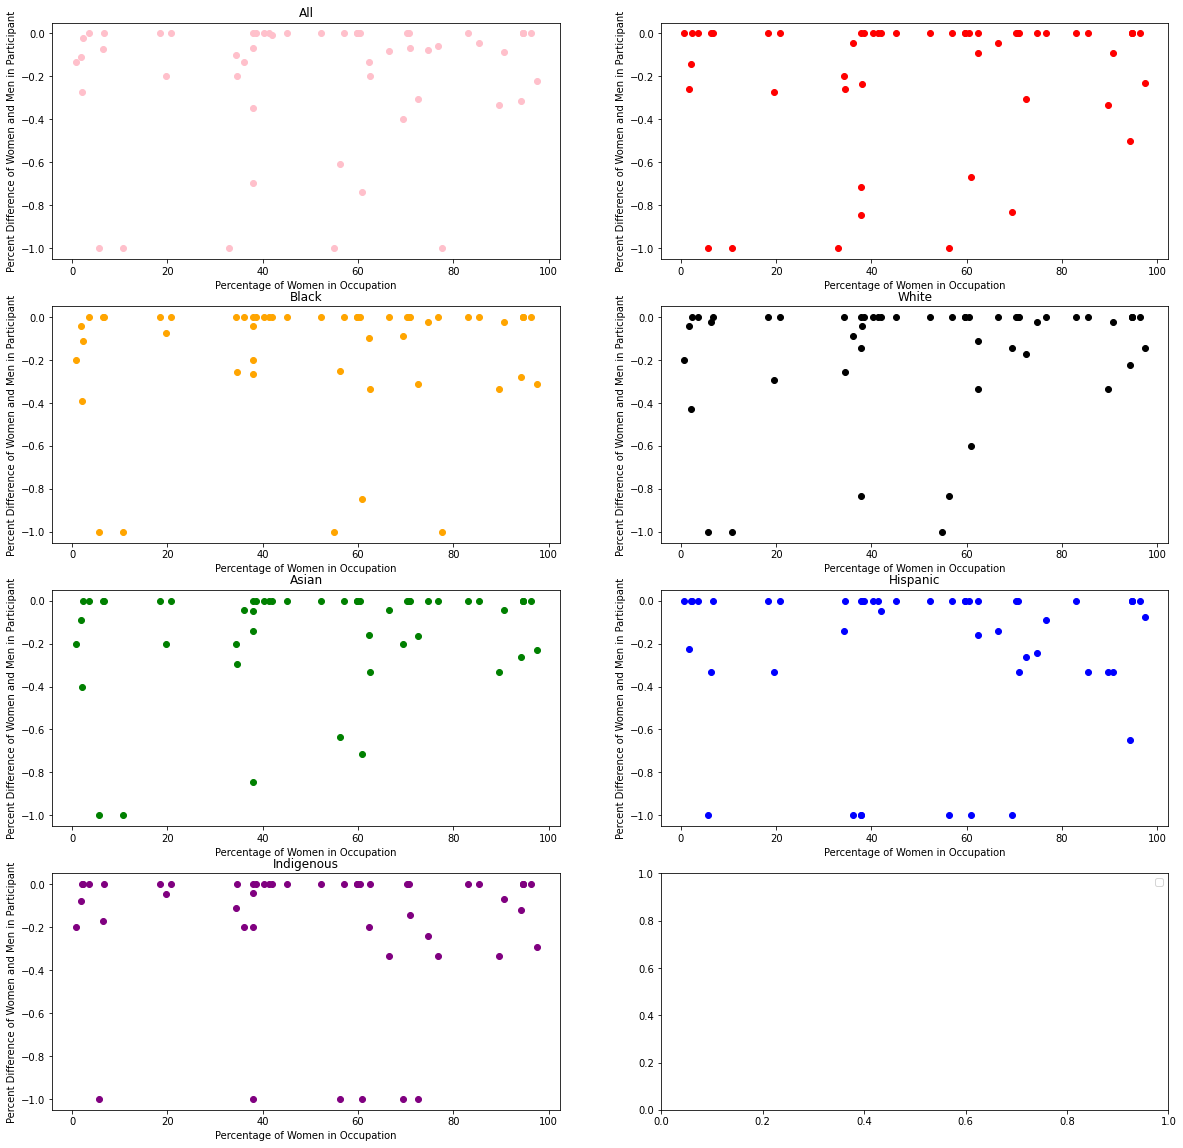

In [133]:

import numpy as np
# for i in range(1):#len(occupation_information['occupation'])):
#     x = list()
#     y = list()
#     occupation = occupation_information['occupation'][i]
#     female_rate = occupation_information['bls_pct_female']
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])

colors = ['pink', 'red', 'orange', 'black', 'green', 'blue', 'purple']
print(race_options)
print(len(race_options), len(colors))

figure, axis = plt.subplots(4, 2, figsize=(20,20))
# figure.tight_layout(pad=10)

scatter_coors = list()
for i in range(4):
    for j in range(2):
        scatter_coors.append([i, j])

print(len(scatter_coors))
all_x = list()
all_y = list()
for j in range(len(race_options)):
    race = race_options[j]
    x = list()
    y = list()
    for i in range(len(occupation_information['occupation'])):
        occupation = occupation_information['occupation'][i]
        female_rate = occupation_information['bls_pct_female'][i]
        # if female_rate > 50:
        #     continue
        female = data_by_occupation[occupation]['participant'][race]['All']['female']
        male = data_by_occupation[occupation]['participant'][race]['All']['male']
        if female + male == 0:
            continue
        y.append((female - male) / (female + male))

        # all_y.append((female - male) / (female + male))
        # all_x.append(female_rate)
        x.append(female_rate)
    all_y.append(y)
    all_x.append(x)
        # data_points.append(((female - male) / (female + male), female_rate))
    # exit()
    # print(len(x), len(y))
    # print(x)
    # print(y)
    line = np.polyfit(x, y, deg=1)
    line_x =list()
    line_y = list()
    # print(line)
    i = 0
    for l in line:
        # print(l)
        if i % 2 == 0:
            line_x.append(l)
        else:
            line_y.append(l)
        i += 1
        # line_x.append(l[0])
        # line_y.appen(l[1])
    # print(line)
    
    axis[scatter_coors[j][0], scatter_coors[j][1]].scatter(x, y, color=colors[j], label=race)#, xlabel='Percentage of Women in Occupation', ylabel='Percent Difference of Women and Men in Occupation')
    axis[scatter_coors[j][0], scatter_coors[j][1]].set_title(f"{race}")
    axis[scatter_coors[j][0], scatter_coors[j][1]].set_xlabel('Percentage of Women in Occupation')
    axis[scatter_coors[j][0], scatter_coors[j][1]].set_ylabel('Percent Difference of Women and Men in Participant')
    # plt.title('tit')

    # ax.title()
    # print(line_x)
    # print(line_y)
    # plt.plot(line_x, line_y, 'r')
plt.legend()
plt.show()
